**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1583]:
# Write your code here
import numpy as np
import pandas as pd
from types import SimpleNamespace
from scipy import optimize
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [1552]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [1553]:
# Define optimal profit function
def profit(p):
    pi = (1-par.gamma)/par.gamma * (p*par.A*par.gamma)**(1/(1-par.gamma))
    return pi

#define optimal labour demand
def labour_dem(p):
    l = (p*par.A*par.gamma)**(1/(1-par.gamma))
    return l

#define optimal output
def output(p):
    y = par.A*labour_dem(p)**par.gamma
    return y

#define labour suply
def opt_labour_sup(p1, p2):
    def labour_sup(l_s):
        c1 = par.alpha*(l_s+par.T+profit(p1)+profit(p2))/p1
        c2 = (1-par.alpha)*(l_s+par.T+profit(p1)+profit(p2))/(p2+par.tau)
        l_s = np.log(c1**par.alpha * c2**(1-par.alpha))-(par.nu*l_s**(1+par.epsilon))/(1+par.epsilon)
        return - l_s

    results = optimize.minimize_scalar(labour_sup,method='bounded',bounds=(0,1000)) 
    return results.x

In [1554]:
# check market clearing conditions
labour_market_clearing = []
good_1_market_clearing = []
good_2_market_clearing = []

for p1 in np.linspace(0.1,2.0,10):
    for p2 in np.linspace(0.1,2.0,10):
        l_1 = labour_dem(p1)
        l_2 = labour_dem(p2)
        l_s = opt_labour_sup(p1, p2)
        y_1 = output(p1)
        y_2 = output(p2)
        c1 = par.alpha*(l_s+par.T+profit(p1)+profit(p2))/p1
        c2 = (1-par.alpha)*(l_s+par.T+profit(p1)+profit(p2))/(p2+par.tau)
        #market clearing conditions
        if np.isclose(l_1+l_2, l_s):
            labour_market_clearing.append(True)
        else:
            labour_market_clearing.append(False)
        if np.isclose(y_1, c1):
            good_1_market_clearing.append(True)
        else:
            good_1_market_clearing.append(False)
        if np.isclose(y_2, c2):
            good_2_market_clearing.append(True)
        else:
            good_2_market_clearing.append(False)

#print results if market clearing conditions are met
if all(labour_market_clearing):
    print('Labour market clearing condition is met')
else:
    print('Labour market clearing condition is not met')

if all(good_1_market_clearing):
    print('Good 1 market clearing condition is met')
else:
    print('Good 1 market clearing condition is not met')

if all(good_2_market_clearing):
    print('Good 2 market clearing condition is met')
else:
    print('Good 2 market clearing condition is not met')

Labour market clearing condition is not met
Good 1 market clearing condition is not met
Good 2 market clearing condition is not met


*We see that no markets clear, when grid searching through the provided sets of prices.*

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [1555]:
#def market clearing conditions
def market_clearing(p):
    l_1 = labour_dem(p[0])
    l_2 = labour_dem(p[1])
    l_s = opt_labour_sup(p[0], p[1])
    y_1 = output(p[0])
    y_2 = output(p[1])
    c1 = par.alpha*(l_s+par.T+profit(p[0])+profit(p[1]))/p[0]
    c2 = (1-par.alpha)*(l_s+par.T+profit(p[0])+profit(p[1]))/(p[1]+par.tau)
    labour_market_clearing = l_1+l_2-l_s
    good_market_1_clearing = y_1-c1
    return labour_market_clearing, good_market_1_clearing

#Using Walras' law we check if the labour market and good 1 market clears and thereby find the equlibrium prices. 
eq_results=optimize.root(market_clearing,[1.0,1.0])
equilibrium_prices=eq_results.x

print(f'Equilibrium prices are p1 = {equilibrium_prices[0]:.5f} and p2 = {equilibrium_prices[1]:.5f}')

Equilibrium prices are p1 = 0.97593 and p2 = 1.49076


*Allowing for all positive prices with no bounds, yields a set of prices, that clears the markets.*

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

*Due to interdependency of prices and tax level/transfers, we need do update the equilibrium prices in order to find the optimal tax*

In [1600]:
#Defininf the social welfare function
def social_welfare(prices_and_tau):

    p1, p2, tau = prices_and_tau
    
    l_1 = labour_dem(p1)
    l_2 = labour_dem(p2)
    l_s = opt_labour_sup(p1, p2)
    y_1 = output(p1)
    y_2 = output(p2)
    c1 = par.alpha*(l_s+tau*y_2+profit(p1)+profit(p2))/p1
    c2 = (1-par.alpha)*(l_s+tau*y_2+profit(p1)+profit(p2))/(p2+tau)

    SWF = np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - (par.nu * l_s ** (1 + par.epsilon)) / (1 + par.epsilon) - par.kappa * y_2

    if np.isclose(l_1 + l_2, l_s) and np.isclose(y_1, c1):
        return -SWF  # maximize SWF by minimizing -SWF
    else:
        return np.inf

tau_0 = [0.98,1.49,0.2] #initial guess: equlibrium prices from previous question, and tau = 0.2

tol=1e-5
bounds = ((tol,5.0), (tol,5.0), (0.0,1.0))
results_sfw = optimize.minimize(social_welfare,tau_0,method='SLSQP', bounds=bounds)
tau_opt = results_sfw.x
tau_opt
#show new prices and optimal tau
print(f'Equilibrium prices are p1 = {tau_opt[0]:.7f}, p2 = {tau_opt[1]:.7f} and tau = {tau_opt[2]:.7f}')

y_2_opt = output(tau_opt[1])
T = tau_opt[2]*y_2_opt   

#show optimal tau and thereby T
print(f'Tau that maximise SWF is {tau_opt[2]:.3f} and T = {T:.3f}')

AttributeError: 'types.SimpleNamespace' object has no attribute 'A'

*We see that optimizing the SWF return the initial guesses. We have tried the optimizing processes for a lot of different initial guesses, however the optimizer keeps returning the initial guess. This could be an indication, that only one set of prices clears the market and that this is not compatable with taxation, however we are not entirely sure, why $\tau = 0$ is not returned in this case.*

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [1558]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [1579]:
#set seed
np.random.seed(17)

#simulate epsilon
epsilon = np.random.normal(0,par.sigma,(par.J,par.K))

#expected utility
expected_utility = np.zeros(par.J)
for j in range(par.J):
    expected_utility[j] = par.v[j] + 1/par.K * np.sum(epsilon[j,:])

#realised utility
realised_utility = np.zeros((par.J, par.K))
for j in range(par.J):
    for k in range(par.K):
        realised_utility[j,k] = par.v[j] + epsilon[j,k]

average_realised_utility = np.mean(realised_utility, axis=1)

#dataframe with expected and average realised utility with 3 decimals
dataframe = pd.DataFrame({'Expected utility': expected_utility, 'Average realised utility': average_realised_utility}).round(3)

#change row names to career 1, career 2 and career 3
dataframe.index = ['Career 1', 'Career 2', 'Career 3']
dataframe


,Expected utility,Average realised utility
Career 1,0.986,0.986
Career 2,1.989,1.989
Career 3,2.982,2.982


*Since the graduates calculate the expected utility based on simulations, that correspond to the realized values, and know true values of $v_j$ fully, expected utility is equivalent to average realized utility.*

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [1560]:
# initialise arrays
prior_expected_utility = np.zeros((par.N, par.J, par.K))
realised_utility = np.zeros((par.N, par.K))
realised_utility_all = np.zeros((par.N, par.J, par.K))
epsilon_own = np.random.normal(0, par.sigma, (par.N, par.J, par.K))

for k in range(par.K):
    for i in range(par.N):
        epsilon_friends = np.random.normal(0, par.sigma, (par.F[i],par.J))

        for j in range(par.J):
            prior_expected_utility[i,j,k] = np.mean(par.v[j] + epsilon_friends[:,j])
            #find best career choice
            career = np.argmax(prior_expected_utility, axis=1)

            # Calculate realised utility for all careers
            realised_utility_all[i, j, k] = par.v[j] + epsilon_own[i,j,k] 

        #realised utility given career choice
        realised_utility[i,k] = par.v[career[i,k]] + epsilon_own[i,career[i,k],k]


In [1599]:
#share of graduates choosing career j
share = np.zeros((par.J, par.N))
for i in range(par.N):
    for j in range(par.J):
        share[j,i] = np.sum(career[i,:]==j)/par.K
    #average prior expected utility
    average_prior_expected_utility = np.mean(prior_expected_utility, axis=2)
    #average realised utility
    average_realised_utility = np.mean(realised_utility, axis=1)

#display share, average_prior_expected_utility and average_realised_utility in a table
share = share.T  # Transpose to shape (N, J)
average_prior_expected_utility = average_prior_expected_utility[:, :3]  # Assuming first 3 columns
average_realised_utility = average_realised_utility.reshape(-1, 1)  # Reshape to column vector

# Concatenate all arrays horizontally
table = np.hstack((share, average_prior_expected_utility, average_realised_utility))

# Create a pandas DataFrame for better display
column_names = [f'Share_{j+1}' for j in range(par.J)] + [f'Avg_prior_exp_u_{j+1}' for j in range(3)] + ['Avg_realised_Utility']
df = pd.DataFrame(table, columns=column_names, index=[f'Graduate_{i+1}' for i in range(par.N)])

# Display the table
df

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 2 has size 3

*We see here that graduates with fewer friends are more prone to choose carrer 1 or 2, in spite of the lower deterministic utility in these careers, and a high share of graduates with many friends choose career 3. This is due to the information level increasing with the number of friends, since then the noise from their friends will vary more precisely around v. Further we see that the types of graduades more prone to choose career 3, also has higher average realized utility.* 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [1562]:
# Initialize arrays
prior_expected_utility_new = np.zeros((par.N, par.J, par.K))
prior_expected_utility_chosen = np.zeros((par.N, par.K))
realised_utility_new = np.zeros((par.N, par.K))
updated_careers = np.zeros((par.N, par.K), dtype=int)  # To track updated careers after comparison
comparison_results = np.zeros((par.N, par.K), dtype=bool) # Initialize comparison results

for k in range(par.K):
    for i in range(par.N):
        chosen_career = career[i, k]
        
        # Modify prior_expected_utility for non-chosen careers
        for j in range(par.J):
            if j != chosen_career:
                prior_expected_utility_new[i,j,k] = prior_expected_utility[i,j,k] - 1
            else:
                prior_expected_utility_new[i,j,k] = realised_utility[i,k]

            #find best career choice given new prior expected utility
            career_new = np.argmax(prior_expected_utility_new, axis=1)


        #realised utility given new career choice (before cost of switching)
        realised_utility_new[i,k] = par.v[career_new[i,k]] + epsilon_own[i,career_new[i,k],k]

        #Prior expected utility for chosen career
        prior_expected_utility_chosen[i,k] = prior_expected_utility_new[i,career_new[i,k],k] 

        # Adjust realised utility after cost of switching
        if realised_utility_new[i,k] != realised_utility[i,k]:
            realised_utility_new[i,k] = realised_utility_new[i,k] - 1
        else:
            realised_utility_new[i,k] = realised_utility_new[i,k]

In [1598]:
share_switching = np.zeros((par.N))

for i in range(par.N):
    #average prior expected utility new 
    average_prior_expected_new = np.mean(prior_expected_utility_chosen, axis=1)
    #average realised utility
    average_realised_new = np.mean(realised_utility_new, axis=1)
    #share of graduates switching career
    share_switching[i] = np.sum(career_new[i,:] != career[i,:])/par.K

#display share, average_prior_expected_utility and average_realised_utility in a table
average_prior_expected_new = average_prior_expected_new.reshape(-1, 1)  # Reshape to column vector
average_realised_utility_new = average_realised_new.reshape(-1, 1)  # Reshape to column vector
share_switching = share_switching.reshape(-1, 1)  # Reshape to column vector

# Concatenate all arrays horizontally
table = np.hstack((share_switching, average_prior_expected_new, average_realised_utility_new))

# Create a pandas DataFrame for better display
column_names = [f'Share of switcher'] + [f'Avg_prior_exp_u_new'] + ['Avg_realised_Utility_new']
df_new = pd.DataFrame(table, columns=column_names, index=[f'Graduate {i+1}' for i in range(par.N)])

# Display the table
df_new

,Share of switcher,Avg_prior_exp_u_new,Avg_realised_Utility_new
Graduate 1,0.2862,2.883083,2.690847
Graduate 2,0.2582,2.909569,2.835947
Graduate 3,0.2347,2.968631,2.921782
Graduate 4,0.2245,3.001530,2.963109
Graduate 5,0.2167,3.000453,2.985352
Graduate 6,0.2140,2.990135,2.976489
Graduate 7,0.1996,3.039171,3.028452
Graduate 8,0.1981,3.041476,3.030178
Graduate 9,0.1890,3.042733,3.020284
Graduate 10,0.1934,3.064619,3.067706


*Again we see more grauates staying in the first career, if they have many friends - due to the information level. Still there is a higher expected utility and realized utility on average, for graduate types, that have many friends*

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [1580]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [1584]:
# Function to calculate distance between p1 (x) and p2 (y) 
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to find A, B, C, and D based on the minimum distance between x and y
def find_points(X, y):
    #Variables to store values. Distance is set to infinity to begin with. 
    A = B = C = D = None
    min_dist_A = min_dist_B = min_dist_C = min_dist_D = float('inf')
    
    #For each point in X we calculate the distance to y. Update the respective point if it is closer if 
    #the current point is closer than the previously found point in that quadrant
    for point in X:
        dist = distance(point, y)
        if point[0] > y[0] and point[1] > y[1] and dist < min_dist_A:
            A, min_dist_A = point, dist
        elif point[0] > y[0] and point[1] < y[1] and dist < min_dist_B:
            B, min_dist_B = point, dist
        elif point[0] < y[0] and point[1] < y[1] and dist < min_dist_C:
            C, min_dist_C = point, dist
        elif point[0] < y[0] and point[1] > y[1] and dist < min_dist_D:
            D, min_dist_D = point, dist
    
    return A, B, C, D

# Find points A, B, C, and D
A, B, C, D = find_points(X, y)

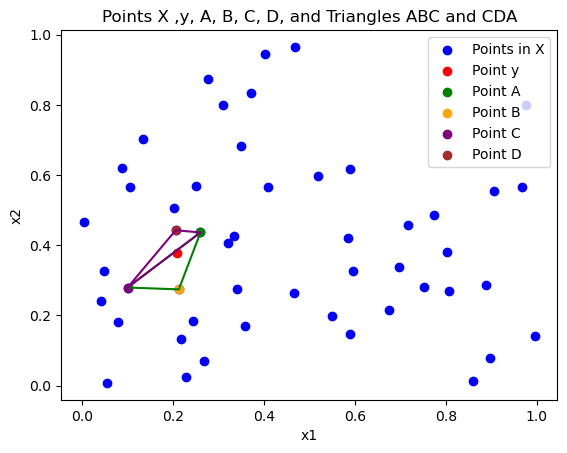

In [1585]:
# Plotting the points in X and y 
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Points in X')

# Plotting the points A, B, C and D if these are replaced with not-None
plt.scatter(y[0], y[1], color='red', label='Point y')
if A is not None:
    plt.scatter(A[0], A[1], color='green', label='Point A')
if B is not None:
    plt.scatter(B[0], B[1], color='orange', label='Point B')
if C is not None:
    plt.scatter(C[0], C[1], color='purple', label='Point C')
if D is not None:
    plt.scatter(D[0], D[1], color='brown', label='Point D')

# Drawing triangles ABC and CDA if the points A, B, C, D are defined
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='green')
if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='purple')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points X ,y, A, B, C, D, and Triangles ABC and CDA')
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [1586]:
# Function to compute the barycentric coordinates. 
#These are a function of the points (ABC or CDA) and the point y. 
def barycentric_coordinates(A, B, C, y):
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Function to check if point is inside triangle. That is if r1, r2 and r3 is in [0,1]. 
def in_triangle(r1, r2, r3):
    return 0 <= r1 <= 1 and 0 <= r2 <= 1 and 0 <= r3 <= 1

# Calling the points A, B, C, and D found in question 1. 
A, B, C, D = find_points(X, y)

# Computing barycentric coordinates for triangle ABC (if the point are defined)
if A is not None and B is not None and C is not None:
    r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
    print("Barycentric coordinates of y with respect to triangle ABC is:", r1_ABC, r2_ABC, r3_ABC)
    if in_triangle(r1_ABC, r2_ABC, r3_ABC):
        print("Point y is inside triangle ABC.")
    else:
        print("Point y is not inside triangle ABC.")
else:
    print("Cannot compute barycentric coordinates for triangle ABC.")

# Computing barycentric coordinates for triangle CDA (if the point are defined)
if C is not None and D is not None and A is not None:
    r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
    print("Barycentric coordinates of y with respect to triangle CDA is:", r1_CDA, r2_CDA, r3_CDA)
    if in_triangle(r1_CDA, r2_CDA, r3_CDA):
        print("Point y is inside triangle CDA.")
    else:
        print("Point y is not inside triangle CDA.")
else:
    print("Cannot compute barycentric coordinates for triangle CDA.")

Barycentric coordinates of y with respect to triangle ABC is: 0.3356579674470462 0.021178593308093727 0.6431634392448602
Point y is inside triangle ABC.
Barycentric coordinates of y with respect to triangle CDA is: 0.07991074927782635 -0.04069057142875678 0.9607798221509304
Point y is not inside triangle CDA.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [1587]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

*For the next two questions, we do **not** approximate the function $f(y)$ for y not in the respective triangles (assuming this is what is meant by the algorithm described above)*

In [1588]:
# Compute barycentric coordinates for triangle ABC
f_y_approx_ABC = np.nan  # Default to NaN if no valid triangle ABC is found
f_y_approx_CDA = np.nan  # Default to NaN if no valid triangle CDA is found

#If A, B, and C are not None we calculate the barycentric_coordinates. If y is in the trangle ABC, 
# the approximation is returned. 
if A is not None and B is not None and C is not None:
    r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
    if in_triangle(r1_ABC, r2_ABC, r3_ABC):
        f_y_approx_ABC = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
        print("Point y is inside triangle ABC.")
    else: print("Point y is not inside triangle CDA.")
else:
    print("Cannot compute barycentric coordinates for triangle ABC because one or more points are None.")

#If C, D, and A are not None we calculate the barycentric_coordinates. If y is in the trangle CDA, 
# the approximation is returned. 
if C is not None and D is not None and A is not None:
    r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
    if in_triangle(r1_CDA, r2_CDA, r3_CDA):
        f_y_approx_CDA = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
        print("Point y is inside triangle CDA.")
    else: print("Point y is not inside triangle CDA.")
else:
    print("Cannot compute barycentric coordinates for triangle CDA because one or more points are None.")

# Compute the true value of f(y)
f_y_true = f(y)

# Compare the approximated value with the true value
print("Approximated value of f(y) in ABC:", f_y_approx_ABC)
print("Approximated value of f(y) in CDA:", f_y_approx_CDA)
print("True value of f(y):", f_y_true)


Point y is inside triangle ABC.
Point y is not inside triangle CDA.
Approximated value of f(y) in ABC: 0.05750281132283574
Approximated value of f(y) in CDA: nan
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [1591]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.5,0.5)]

In [1592]:
# Loop through each point in Y and compute the approximation from question 3 
for y in Y:
    
    print(f"For point {y}:")

    A, B, C, D = find_points(X, y)
    f_y_approx_ABC = np.nan  # Default to NaN if no valid triangle ABC is found
    f_y_approx_CDA = np.nan  # Default to NaN if no valid triangle CDA is found
    
    if A is not None and B is not None and C is not None:
        r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
        if in_triangle(r1_ABC, r2_ABC, r3_ABC):
            f_y_approx_ABC = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
            print("Point y is inside triangle ABC.")
        else: print("Point y is not inside triangle ABC.")
    
    if C is not None and D is not None and A is not None:
        r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
        if in_triangle(r1_CDA, r2_CDA, r3_CDA):
            f_y_approx_CDA = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
            print("Point y is inside triangle CDA.")
        else: print("Point y is not inside triangle CDA.")
    
    f_y_true = f(y)
    
    print("Approximated value of f(y) in ABC:", f_y_approx_ABC)
    print("Approximated value of f(y) in CDA:", f_y_approx_CDA)
    print("True value of f(y):", f_y_true)
    print()

For point (0.2, 0.2):
Point y is not inside triangle ABC.
Point y is not inside triangle CDA.
Approximated value of f(y) in ABC: nan
Approximated value of f(y) in CDA: nan
True value of f(y): 0.04000000000000001

For point (0.8, 0.2):
Point y is inside triangle ABC.
Point y is not inside triangle CDA.
Approximated value of f(y) in ABC: 0.09419736792568295
Approximated value of f(y) in CDA: nan
True value of f(y): 0.16000000000000003

For point (0.8, 0.8):
Approximated value of f(y) in ABC: nan
Approximated value of f(y) in CDA: nan
True value of f(y): 0.6400000000000001

For point (0.5, 0.5):
Point y is not inside triangle ABC.
Point y is not inside triangle CDA.
Approximated value of f(y) in ABC: nan
Approximated value of f(y) in CDA: nan
True value of f(y): 0.25

